In [21]:
# Various tools
import numpy as np
from preprocessing import load_normalized_image, add_gaussian_noise, resize
from im_tools import fast_noise_std_estimation, relationship_coefficient
from coefficients_data_handler import get_surface_function, get_closest_point, load_data
# Noise reduction
from p_laplacian_denoising_algorithms import p_laplacian_denoising
# Results
from results_tools import plot_simple_image, plot_model_curves

In [37]:
# Noise profile
std = .15
# Image parameters
img_index = 0
# Parameters for denoising
p = 1
case = ''
# Database indices
db_index = 1

In [23]:
img = load_normalized_image(f'noise_test_images/img_{img_index}')
img_noise = add_gaussian_noise(img, avg=0, std=std)

H, W, C = img.shape

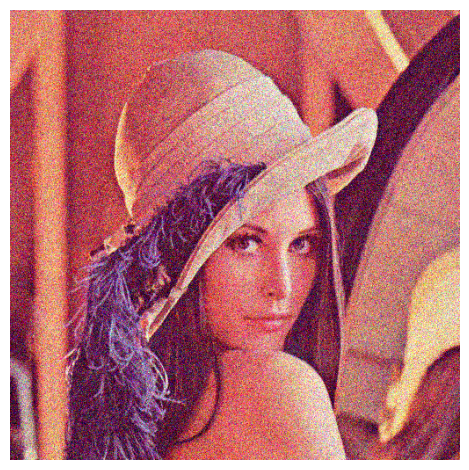

In [24]:
plot_simple_image(img_noise)

In [25]:
std_est = fast_noise_std_estimation(img_noise)

In [27]:
df = load_data(f'synth_images_testing/synth_img_{db_index}/results_log/coefficientsP{p}{case}.csv')

In [28]:
closest_point_data = get_closest_point(df, 565, 565)
width_synth = int(closest_point_data['width'])
height_synth = int(closest_point_data['height'])

In [29]:
img_noise_resized = resize(img_noise, width_synth, height_synth)

In [46]:
# Calculate relationships of synth images images w.r.t. natural images
relationships = []
surface_coefs = []
for db_index in range(1, 17):
    synth_img = load_normalized_image(f'synth_images_testing/synth_img_{db_index}/synth_img_{width_synth}_{height_synth}.png')
    coef = relationship_coefficient(synth_img, img_noise_resized)
    print(f'Synth img {db_index} relationship: {coef}')
    relationships.append(coef)
    my_surf = get_surface_function(db_index, std_est, p, case)
    surface_coefs.append(my_surf(W / 640, H / 640))
proximity_indices = np.flip(np.argsort(relationships))

Synth img 1 relationship: 311767.8793645561
Synth img 2 relationship: 193023.4864053919
Synth img 3 relationship: 273128.63742584875
Synth img 4 relationship: 171643.50435233733
Synth img 5 relationship: 146996.90109848254
Synth img 6 relationship: 121437.24053164633
Synth img 7 relationship: 222909.51914536863
Synth img 8 relationship: 147170.9447069798
Synth img 9 relationship: 260118.08639688883
Synth img 10 relationship: 250608.1824027368
Synth img 11 relationship: 208634.03580251941
Synth img 12 relationship: 254095.67353153447
Synth img 13 relationship: 274908.46796957805
Synth img 14 relationship: 360949.86366851314
Synth img 15 relationship: 177289.92525737468
Synth img 16 relationship: 152620.51113448845


In [49]:
print(proximity_indices[:4])

[13  0 12  2]


In [50]:
proximity_coefficients = []
for index in proximity_indices[:4]:
    proximity_coefficients.append(surface_coefs[index])
proximity_coefficient = np.sum(proximity_coefficients) / 4

In [51]:
proximity_coefficient

0.9602290943158136